# Density-based
## EPS

## QSAR Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [2]:
data: pd.DataFrame = pd.read_csv('../../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    
data.pop(1024) #Remove target variable

EPS = [0.1, 0.5, 1, 2.5, 5, 10, 15]
rows, cols = ds.choose_grid(len(EPS))

EPS - 0.1


MemoryError: Unable to allocate 617. MiB for an array with shape (8992, 8992) and data type float64

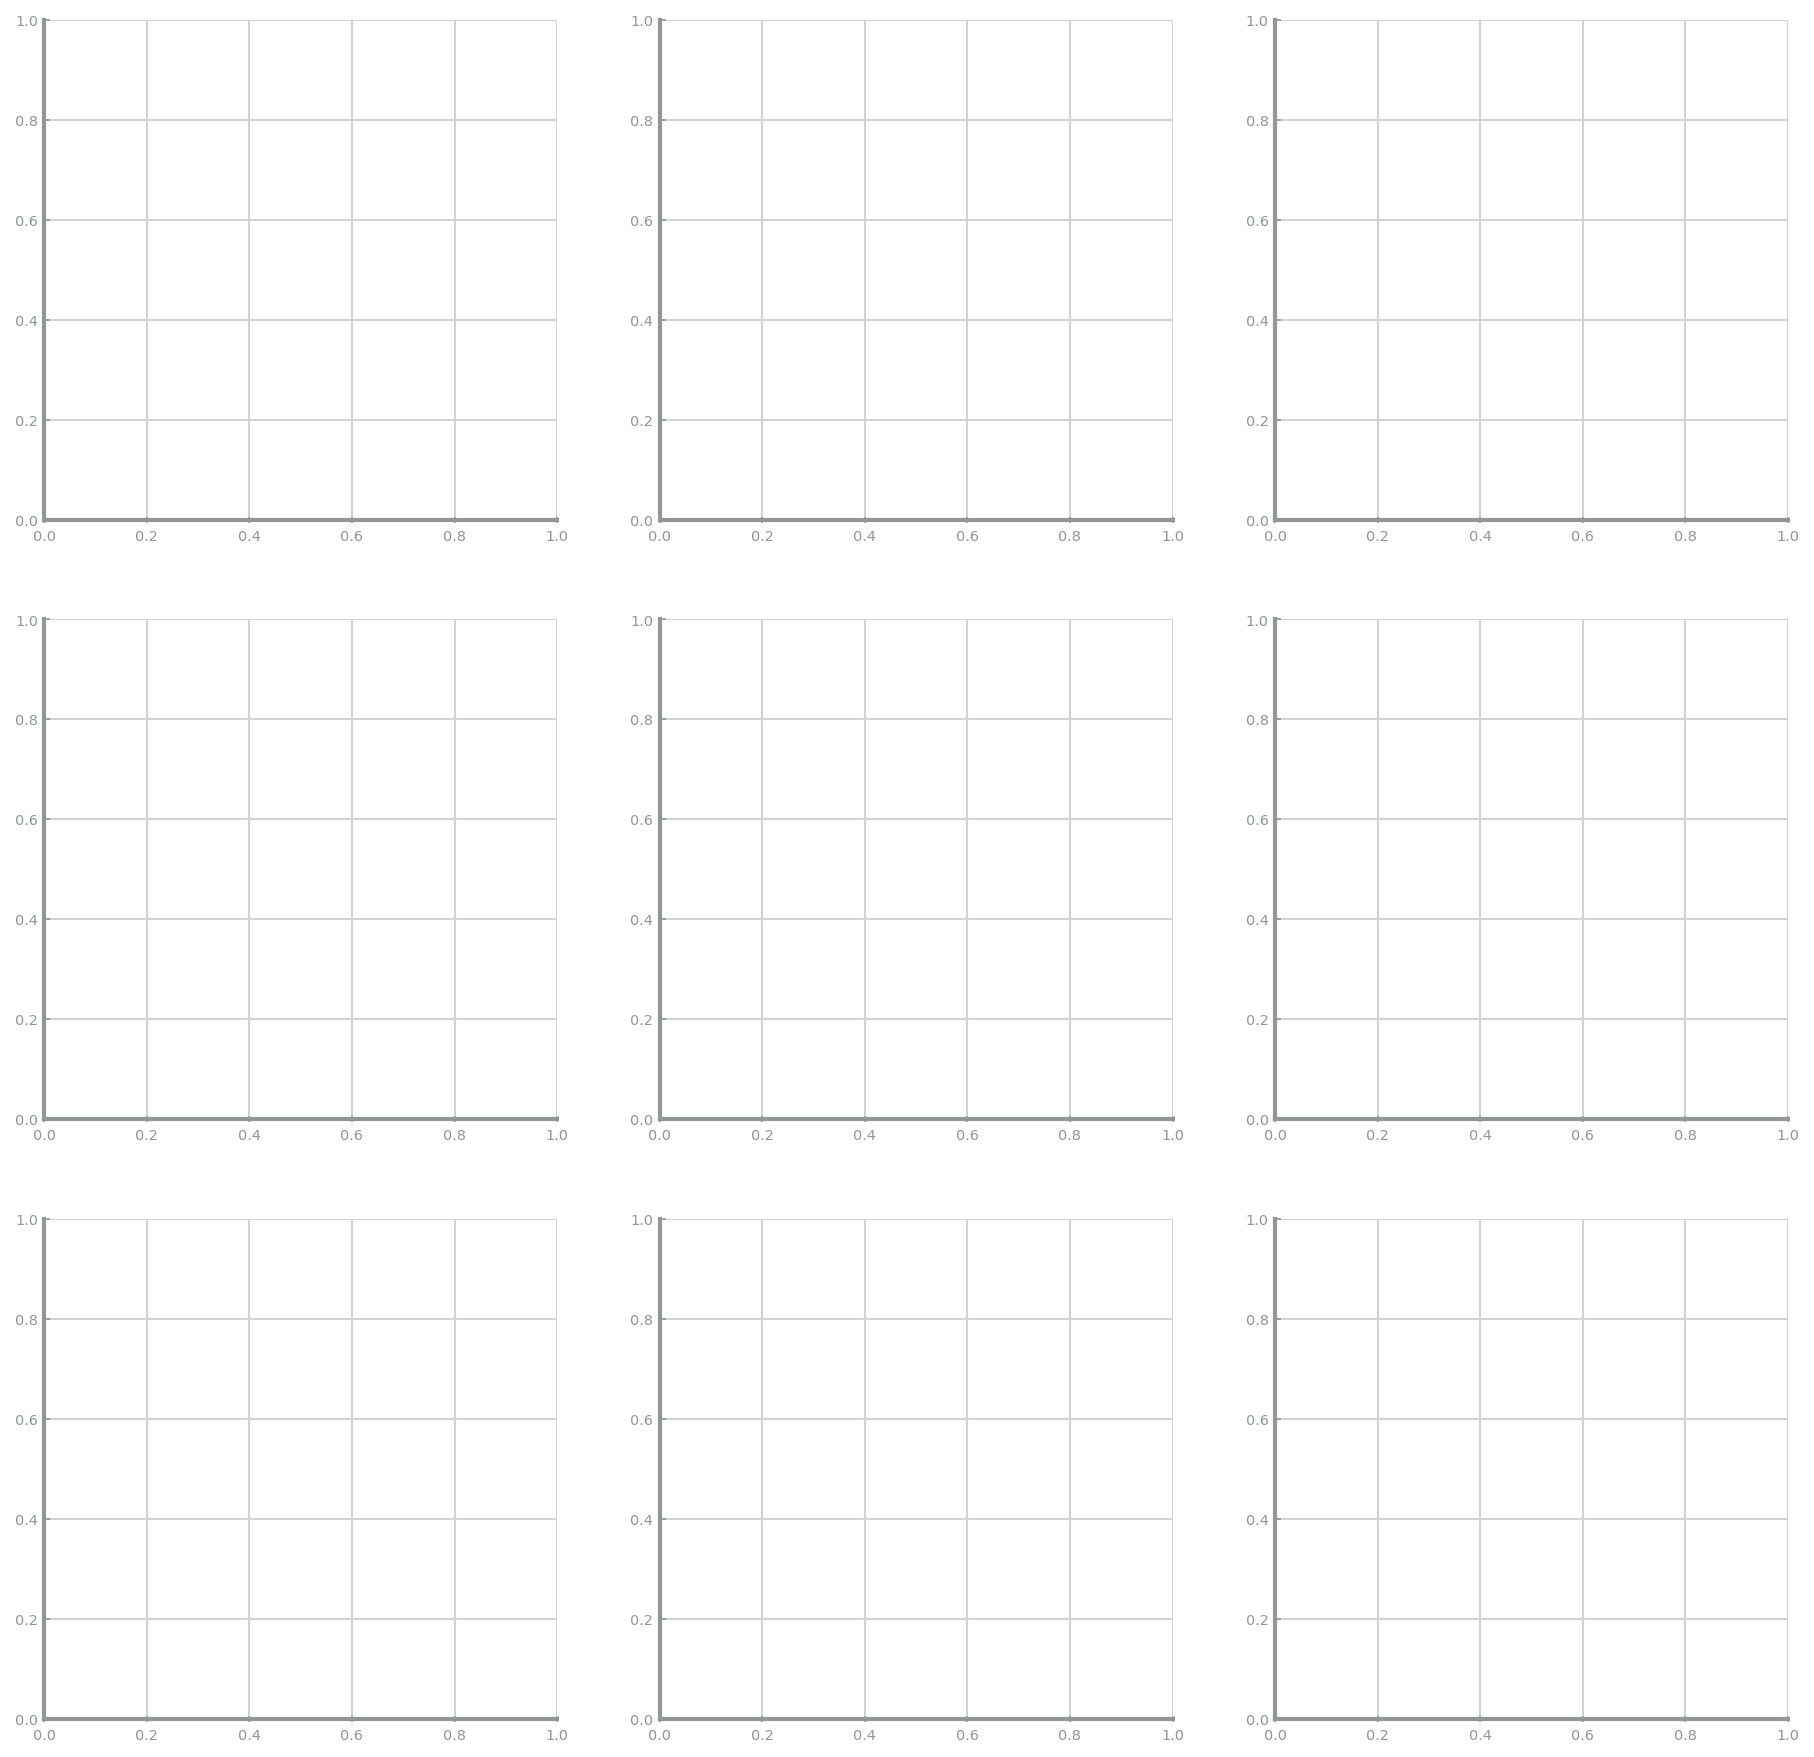

In [3]:
mse: list = []
sc: list = []
db: list = []

_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(EPS)):
    print("EPS - " + str(EPS[n]))
    estimator = DBSCAN(eps=EPS[n], min_samples=2)
    estimator.fit(data)
    labels = estimator.labels_
    k = len(set(labels)) - (1 if -1 in labels else 0)
    if k > 1:
        centers = ds.compute_centroids(data, labels)
        mse.append(ds.compute_mse(data.values, labels, centers))
        sc.append(silhouette_score(data, labels))
        db.append(davies_bouldin_score(data, labels))
        
        print("good")


        ds.plot_clusters(data, 1, 2, labels.astype(float), estimator.components_, k,
                         f'DBSCAN eps={EPS[n]} k={k}', ax=axs[i,j])
        i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
    else:
        mse.append(0)
        sc.append(0)
        db.append(0)
plt.show()

In [ ]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(EPS, mse, title='EM MSE', xlabel='EPS', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(EPS, sc, title='EM SC', xlabel='EPS', ylabel='SC', ax=ax[0, 0])
ds.plot_line(EPS, db, title='EM DB', xlabel='EPS', ylabel='DB', ax=ax[0, 1])
plt.show()

## Trying different distance metrics

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

METRICS = ['euclidean', 'cityblock', 'chebyshev', 'cosine', 'jaccard', 'hamming']
distances = []
for m in METRICS:
    dist = np.mean(np.mean(squareform(pdist(data.values, metric=m))))
    distances.append(dist)

print('AVG distances among records', distances)
distances[0] *= 0.6
distances[1] *= 0.4
distances[2] *= 0.6
distances[3] *= 0.1
distances[4] *= 0.1
distances[5] *= 1

print('CHOSEN EPS', distances)


In [ ]:
mse: list = []
sc: list = []
db: list = []

rows, cols = ds.choose_grid(len(METRICS))
_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(METRICS)):
    estimator = DBSCAN(eps=distances[n], min_samples=2, metric=METRICS[n])
    estimator.fit(data)
    labels = estimator.labels_
    k = len(set(labels)) - (1 if -1 in labels else 0)
    print("We got k={}".format(k))
    if k > 1:
        centers = ds.compute_centroids(data, labels)
        mse.append(ds.compute_mse(data.values, labels, centers))
        sc.append(silhouette_score(data, labels))
        db.append(davies_bouldin_score(data, labels))

        
        ds.plot_clusters(data, 1, 2, labels.astype(float), estimator.components_, k,
                         f'DBSCAN metric={METRICS[n]} eps={distances[n]:.2f} k={k}', ax=axs[i,j])
    else:
        mse.append(0)
        sc.append(0)
        db.append(0)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,3))
ds.bar_chart(METRICS, mse, title='DBSCAN MSE', xlabel='metric', ylabel='MSE')
plt.show()

fig = plt.figure(figsize=(6,3))
ds.bar_chart(METRICS, db, title='DBSCAN DB', xlabel='metric', ylabel='DB')
plt.show()

fig = plt.figure(figsize=(6,3))
ds.bar_chart(METRICS, sc, title='DBSCAN SC', xlabel='metric', ylabel='SC')
plt.show()
print(sc)


#fig, ax = plt.subplots(1, 2, figsize=(8, 3), squeeze=False)
#ds.bar_chart(METRICS, db, title='DBSCAN DB', xlabel='metric', ylabel='DB', ax=ax[0, 0])
#ds.bar_chart(METRICS, sc, title='DBSCAN SC', xlabel='metric', ylabel='SC', ax=ax[0, 1], percentage=True)
#plt.show()

## QSAR Dataset - Chi Feature Selection

In [ ]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/ORAL_S_FChi.csv', sep=';', header=None)    
data.pop(len(data.columns)-1).values #Remove target variable

EPS = [0.1, 0.5, 1, 2.5, 5, 10, 15]
rows, cols = ds.choose_grid(len(EPS))

In [ ]:
mse: list = []
sc: list = []
db: list = []

_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(EPS)):
    print("EPS - " + str(EPS[n]))
    estimator = DBSCAN(eps=EPS[n], min_samples=2)
    estimator.fit(data)
    labels = estimator.labels_
    k = len(set(labels)) - (1 if -1 in labels else 0)
    if k > 1:
        centers = ds.compute_centroids(data, labels)
        mse.append(ds.compute_mse(data.values, labels, centers))
        sc.append(silhouette_score(data, labels))
        db.append(davies_bouldin_score(data, labels))
        
        print("good")


        ds.plot_clusters(data, 1, 2, labels.astype(float), estimator.components_, k,
                         f'DBSCAN eps={EPS[n]} k={k}', ax=axs[i,j])
        i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
    else:
        mse.append(0)
        sc.append(0)
        db.append(0)
plt.show()

In [ ]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(EPS, mse, title='EM MSE', xlabel='EPS', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(EPS, sc, title='EM SC', xlabel='EPS', ylabel='SC', ax=ax[0, 0])
ds.plot_line(EPS, db, title='EM DB', xlabel='EPS', ylabel='DB', ax=ax[0, 1])
plt.show()

## Metrics

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

METRICS = ['euclidean', 'cityblock', 'chebyshev', 'jaccard', 'hamming']
distances = []
for m in METRICS:
    dist = np.mean(np.mean(squareform(pdist(data.values, metric=m))))
    distances.append(dist)

print('AVG distances among records', distances)
distances[0] *= 0.6
distances[1] *= 0.4
distances[2] *= 0.6
distances[3] *= 0.1
distances[4] *= 1

print('CHOSEN EPS', distances)


In [ ]:
mse: list = []
sc: list = []
db: list = []

rows, cols = ds.choose_grid(len(METRICS))
_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(METRICS)):
    estimator = DBSCAN(eps=distances[n], min_samples=2, metric=METRICS[n])
    estimator.fit(data)
    labels = estimator.labels_
    k = len(set(labels)) - (1 if -1 in labels else 0)
    print("We got k={}".format(k))
    if k > 1:
        centers = ds.compute_centroids(data, labels)
        mse.append(ds.compute_mse(data.values, labels, centers))
        sc.append(silhouette_score(data, labels))
        db.append(davies_bouldin_score(data, labels))

        
        ds.plot_clusters(data, 1, 2, labels.astype(float), estimator.components_, k,
                         f'DBSCAN metric={METRICS[n]} eps={distances[n]:.2f} k={k}', ax=axs[i,j])
    else:
        mse.append(0)
        sc.append(0)
        db.append(0)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,3))
ds.bar_chart(METRICS, mse, title='DBSCAN MSE', xlabel='metric', ylabel='MSE')
plt.show()

fig = plt.figure(figsize=(6,3))
ds.bar_chart(METRICS, db, title='DBSCAN DB', xlabel='metric', ylabel='DB')
plt.show()

fig = plt.figure(figsize=(6,3))
ds.bar_chart(METRICS, sc, title='DBSCAN SC', xlabel='metric', ylabel='SC')
plt.show()
print(sc)


#fig, ax = plt.subplots(1, 2, figsize=(8, 3), squeeze=False)
#ds.bar_chart(METRICS, db, title='DBSCAN DB', xlabel='metric', ylabel='DB', ax=ax[0, 0])
#ds.bar_chart(METRICS, sc, title='DBSCAN SC', xlabel='metric', ylabel='SC', ax=ax[0, 1], percentage=True)
#plt.show()

## QSAR Dataset - Reduced Chi

In [ ]:
def bin_to_integer(bitlist):
    """Returns the integer conversion from a number represented in a binary string"""
    out = 0
    for bit in bitlist:
        out = (out << 1) | int(bit)

    return out

In [ ]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/reduced/ORAL_S_FChi_reduced32.csv', sep=';', header=None)    
data.pop(len(data.columns)-1).values #Remove target variable

for index, row in data.iterrows():
    for col in data.columns:
        data.at[index,col] = bin_to_integer(row[col])
        
EPS = [0.1, 0.5, 1, 2.5, 5, 10, 15]
rows, cols = ds.choose_grid(len(EPS))

In [ ]:
mse: list = []
sc: list = []
db: list = []

_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(EPS)):
    print("EPS - " + str(EPS[n]))
    estimator = DBSCAN(eps=EPS[n], min_samples=2)
    estimator.fit(data)
    labels = estimator.labels_
    k = len(set(labels)) - (1 if -1 in labels else 0)
    if k > 1:
        centers = ds.compute_centroids(data, labels)
        mse.append(ds.compute_mse(data.values, labels, centers))
        sc.append(silhouette_score(data, labels))
        db.append(davies_bouldin_score(data, labels))
        
        print("good")


        ds.plot_clusters(data, 1, 2, labels.astype(float), estimator.components_, k,
                         f'DBSCAN eps={EPS[n]} k={k}', ax=axs[i,j])
        i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
    else:
        mse.append(0)
        sc.append(0)
        db.append(0)
plt.show()

In [ ]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(EPS, mse, title='EM MSE', xlabel='EPS', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(EPS, sc, title='EM SC', xlabel='EPS', ylabel='SC', ax=ax[0, 0])
ds.plot_line(EPS, db, title='EM DB', xlabel='EPS', ylabel='DB', ax=ax[0, 1])
plt.show()

## Metrics

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

METRICS = ['euclidean', 'cityblock', 'chebyshev', 'jaccard', 'hamming']
distances = []
for m in METRICS:
    dist = np.mean(np.mean(squareform(pdist(data.values, metric=m))))
    distances.append(dist)

print('AVG distances among records', distances)
distances[0] *= 0.6
distances[1] *= 0.4
distances[2] *= 0.6
distances[3] *= 0.1
distances[4] *= 1

print('CHOSEN EPS', distances)


In [ ]:
mse: list = []
sc: list = []
db: list = []

rows, cols = ds.choose_grid(len(METRICS))
_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(METRICS)):
    estimator = DBSCAN(eps=distances[n], min_samples=2, metric=METRICS[n])
    estimator.fit(data)
    labels = estimator.labels_
    k = len(set(labels)) - (1 if -1 in labels else 0)
    print("We got k={}".format(k))
    if k > 1:
        centers = ds.compute_centroids(data, labels)
        mse.append(ds.compute_mse(data.values, labels, centers))
        sc.append(silhouette_score(data, labels))
        db.append(davies_bouldin_score(data, labels))

        
        ds.plot_clusters(data, 1, 2, labels.astype(float), estimator.components_, k,
                         f'DBSCAN metric={METRICS[n]} eps={distances[n]:.2f} k={k}', ax=axs[i,j])
    else:
        mse.append(0)
        sc.append(0)
        db.append(0)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,3))
ds.bar_chart(METRICS, mse, title='DBSCAN MSE', xlabel='metric', ylabel='MSE')
plt.show()

fig = plt.figure(figsize=(6,3))
ds.bar_chart(METRICS, db, title='DBSCAN DB', xlabel='metric', ylabel='DB')
plt.show()

fig = plt.figure(figsize=(6,3))
ds.bar_chart(METRICS, sc, title='DBSCAN SC', xlabel='metric', ylabel='SC')
plt.show()
print(sc)


#fig, ax = plt.subplots(1, 2, figsize=(8, 3), squeeze=False)
#ds.bar_chart(METRICS, db, title='DBSCAN DB', xlabel='metric', ylabel='DB', ax=ax[0, 0])
#ds.bar_chart(METRICS, sc, title='DBSCAN SC', xlabel='metric', ylabel='SC', ax=ax[0, 1], percentage=True)
#plt.show()